In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [79]:
df = pd.read_csv('model_final_df')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hasCredit                747 non-null    int64  
 1   numCreditTnx             747 non-null    float64
 2   creditSpendToLimitRatio  747 non-null    float64
 3   hasSavings               747 non-null    int64  
 4   incomeSavedOverTime      747 non-null    float64
 5   numSavingsTnx            747 non-null    float64
 6   hasChecking              747 non-null    int64  
 7   numCheckingTnx           747 non-null    float64
 8   averageCheckingTnx       747 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 52.6 KB


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled.head()

,hasCredit,numCreditTnx,creditSpendToLimitRatio,hasSavings,incomeSavedOverTime,numSavingsTnx,hasChecking,numCheckingTnx,averageCheckingTnx
0,0.0,0.000000,0.121996,0.0,0.000000,0.000000,0.0,0.000000,0.727593
1,0.0,0.206452,0.123089,1.0,0.019196,0.306452,1.0,0.525253,0.617054
2,1.0,0.438710,0.120173,1.0,0.045363,0.774194,0.0,0.000000,0.727593
3,1.0,0.096774,0.183671,1.0,0.008792,0.193548,1.0,0.939394,0.705898
4,1.0,0.141935,0.167074,1.0,0.059136,0.193548,1.0,1.000000,0.498721


## K-Means Clustering, Elbow Method


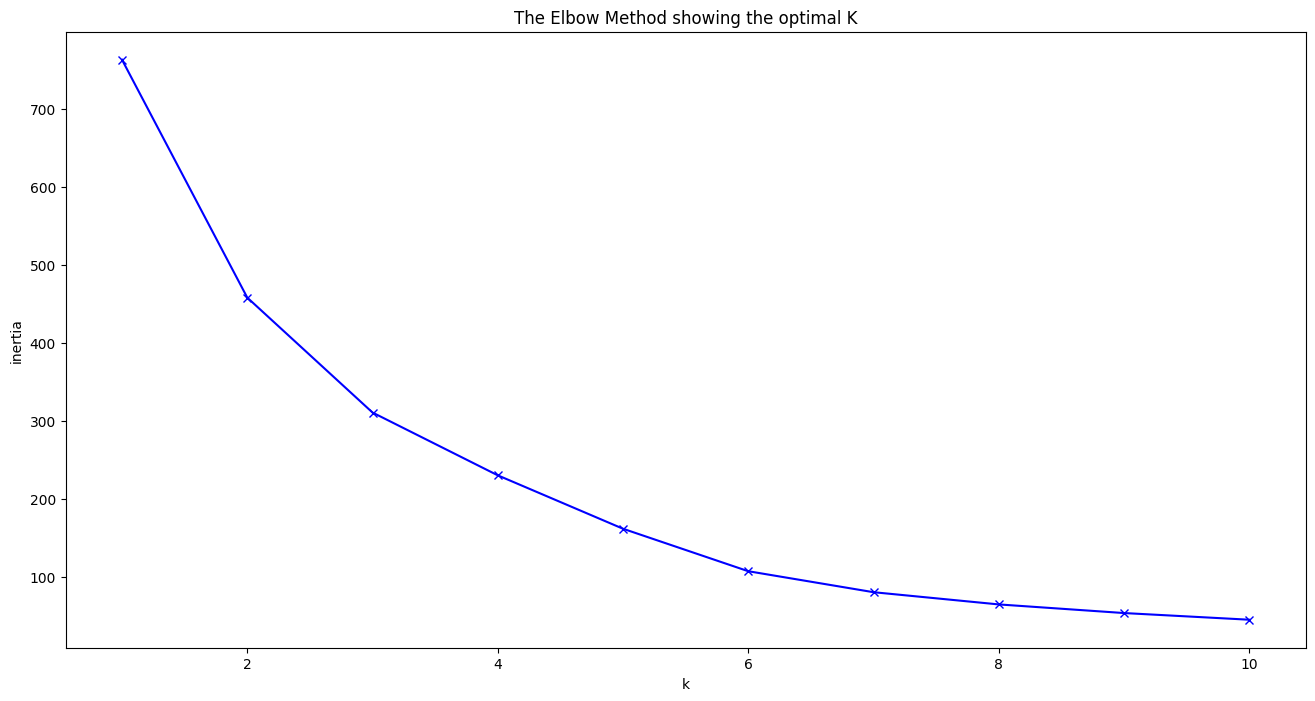

In [81]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

## Silhouette Method

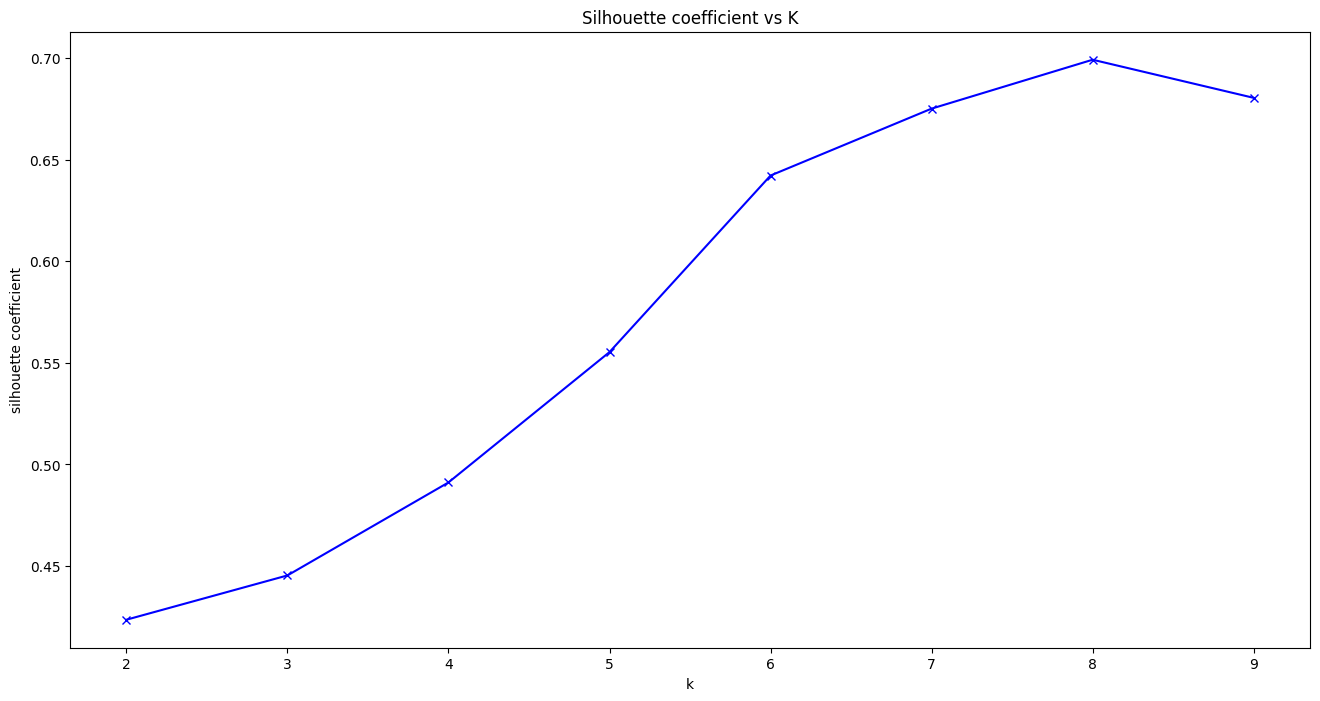

In [82]:
from sklearn.metrics import silhouette_score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

* 8 clusters looks a little outrageous!!
* changing `hasCredit` etc to lower scales

In [93]:
# df_ = df_scaled # checkpoint
df_scaled = df_


In [94]:

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hasCredit                747 non-null    float64
 1   numCreditTnx             747 non-null    float64
 2   creditSpendToLimitRatio  747 non-null    float64
 3   hasSavings               747 non-null    float64
 4   incomeSavedOverTime      747 non-null    float64
 5   numSavingsTnx            747 non-null    float64
 6   hasChecking              747 non-null    float64
 7   numCheckingTnx           747 non-null    float64
 8   averageCheckingTnx       747 non-null    float64
dtypes: float64(9)
memory usage: 52.6 KB


In [95]:
for col in ['hasCredit', 'hasSavings', 'hasChecking']:
    df_scaled[col] = df[col]/3
df_scaled.head()

,hasCredit,numCreditTnx,creditSpendToLimitRatio,hasSavings,incomeSavedOverTime,numSavingsTnx,hasChecking,numCheckingTnx,averageCheckingTnx
0,0.000000,0.000000,0.121996,0.000000,0.000000,0.000000,0.000000,0.000000,0.727593
1,0.000000,0.206452,0.123089,0.333333,0.019196,0.306452,0.333333,0.525253,0.617054
2,0.333333,0.438710,0.120173,0.333333,0.045363,0.774194,0.000000,0.000000,0.727593
3,0.333333,0.096774,0.183671,0.333333,0.008792,0.193548,0.333333,0.939394,0.705898
4,0.333333,0.141935,0.167074,0.333333,0.059136,0.193548,0.333333,1.000000,0.498721


## Elbow Method

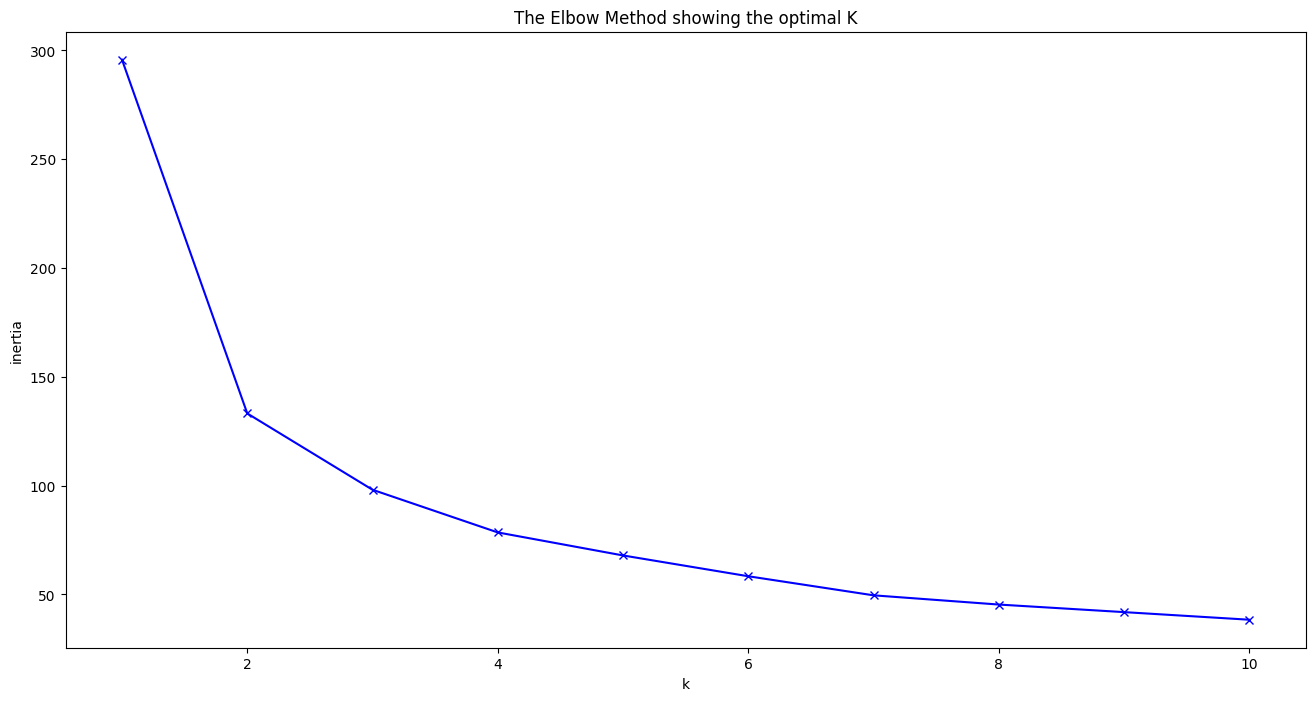

In [96]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

## Silhouette Method

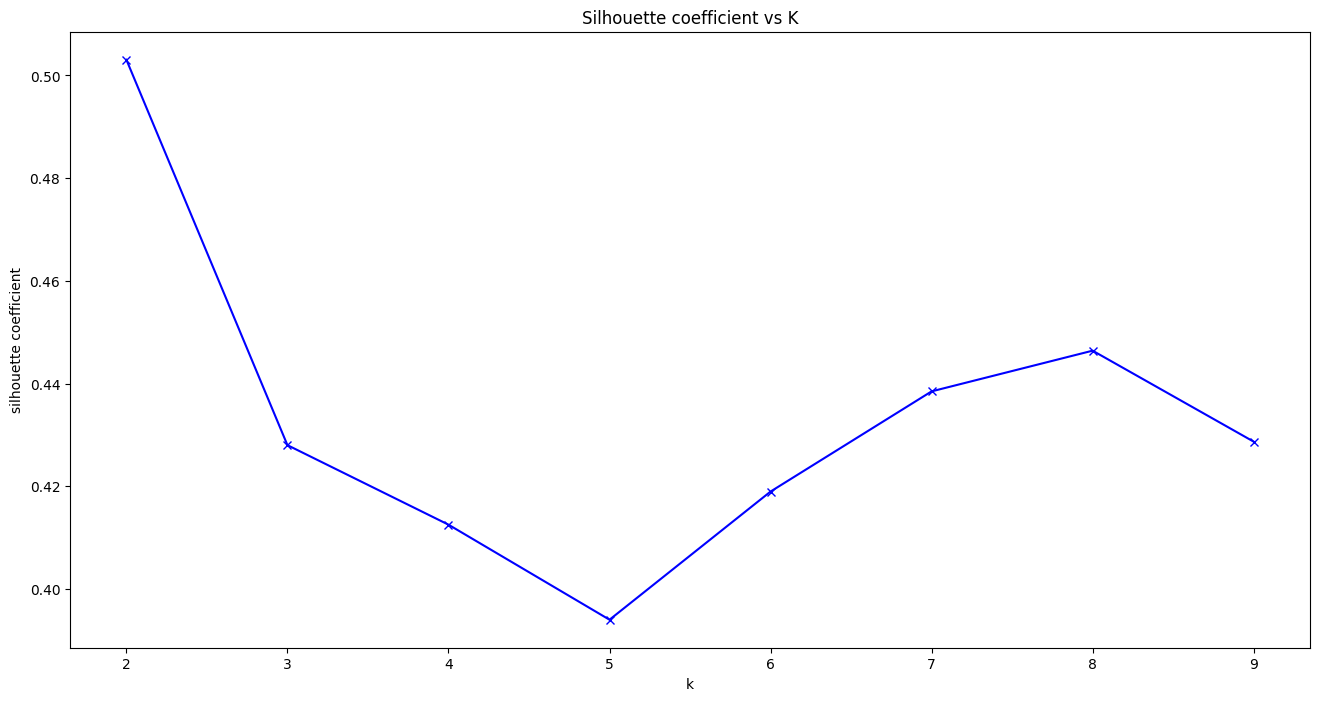

In [97]:
from sklearn.metrics import silhouette_score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

* OK 2 clusters seems a bit more reasonable! 

In [98]:
kmeanModel = KMeans(n_clusters=2).fit(df_scaled)

kmeanModel.cluster_centers_

array([[0.09225092, 0.10198786, 0.12845215, 0.16851169, 0.00628518,
        0.20985597, 0.05412054, 0.04208133, 0.71751519],
       [0.17717087, 0.21527514, 0.12326068, 0.19817927, 0.00742404,
        0.25965709, 0.33333333, 0.95651897, 0.65689892]])

In [99]:
centroids = kmeanModel.cluster_centers_

### Visualize with radial plot

In [100]:
import plotly.graph_objects as go

categories = list(df_scaled.columns)
categories


['hasCredit',
 'numCreditTnx',
 'creditSpendToLimitRatio',
 'hasSavings',
 'incomeSavedOverTime',
 'numSavingsTnx',
 'hasChecking',
 'numCheckingTnx',
 'averageCheckingTnx']

In [101]:


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=centroids[0],
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=centroids[1],
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

# Hierarchal Method
## n_clusters = 2
* depending on the results, this might change

In [102]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 2) # from K clusters

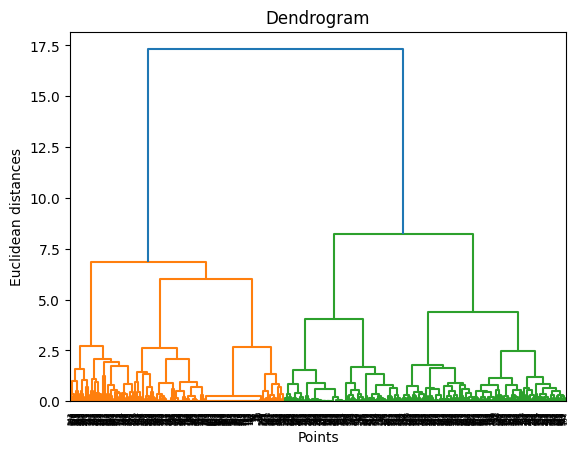

In [103]:
X = df_scaled
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
    
plot_dendrogram(X)

# Visualize with radar graph

# PCA to reduce dimensions and plot

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
df_pca = pca.fit(df_scaled)
df_pca

PCA()

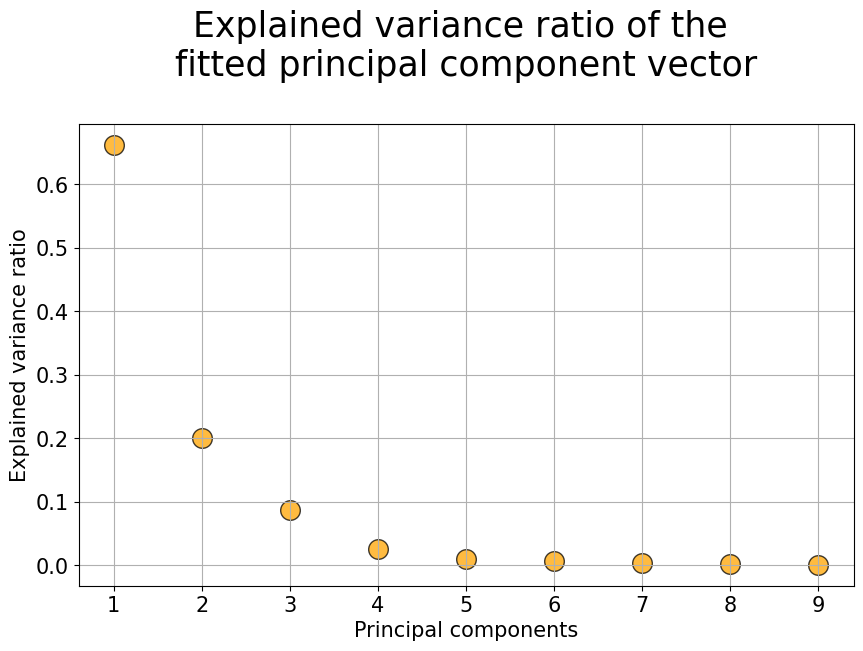

In [ ]:
# Expanded variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

* Very impressive! First 2 contributes 80% of the total!

# Visualizing class separation with PCA

In [ ]:
# applying K-clusters method to the PCA 
kmeanModel = KMeans(n_clusters=2)
labels = kmeanModel.fit_predict(pca.transform(df_scaled))

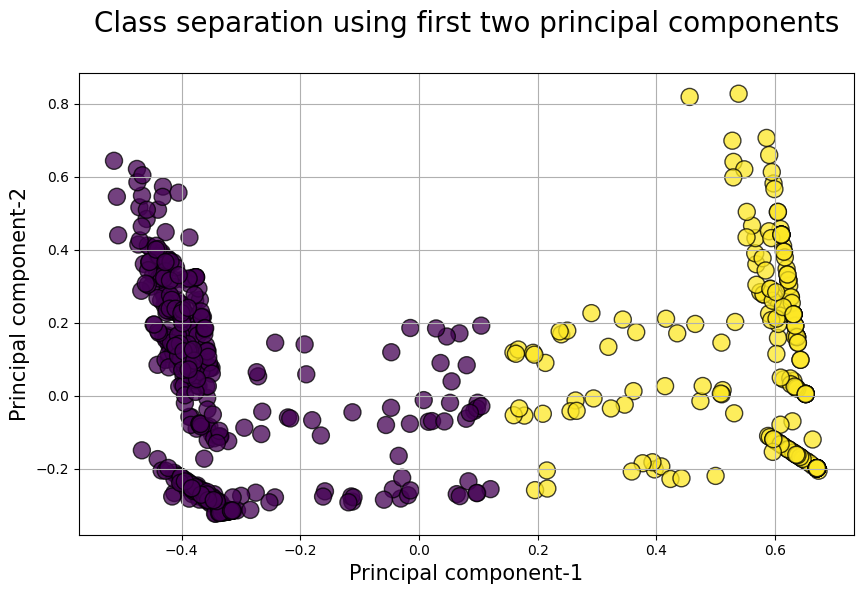

In [ ]:
# plot the scatter diagram

df_trans = pca.transform(df_scaled)
df_trans = pd.DataFrame(data=df_trans)

plt.figure(figsize=(10,6))
plt.scatter(df_trans[0],df_trans[1],c=labels,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()


* Hmmm.....